In [72]:
from nmon import *

In [73]:
'''
100 1 - EJ
GPU : 
tensorflow - no advantage
pytorch - eigh not implemented

C++:
cython numpy - 5 sec (real), 20 sec (complex)
numba numpy - 8 sec (real), 30 sec (complex)

tensorflow - 8 sec (real), 55 sec (complex)

spla - 10 sec (real), 16 sec (complex)

External C++:
Too slow


TODO:
1. check sparsity level for (100, 1) and (100, 100) and (1, 1) - same cutoff - SAME
2. does the matrix have to be complex? - NO

3. Solve Tridiagonal, the rest is perturbation
4. Change of basis for Tensor decomp.: study the formation of the hamiltonian from sym representation

'''

'\n100 1 - EJ\nGPU : \ntensorflow - no advantage\npytorch - eigh not implemented\n\nC++:\ncython numpy - 5 sec (real), 20 sec (complex)\nnumba numpy - 8 sec (real), 30 sec (complex)\n\ntensorflow - 8 sec (real), 55 sec (complex)\n\nspla - 10 sec (real), 16 sec (complex)\n\nExternal C++:\nToo slow\n\n\nTODO:\n1. check sparsity level for (100, 1) and (100, 100) and (1, 1) - same cutoff - SAME\n2. does the matrix have to be complex? - NO\n\n3. Solve Tridiagonal, the rest is perturbation\n4. Change of basis for Tensor decomp.: study the formation of the hamiltonian from sym representation\n\n'

In [74]:

# nmon [-7.26039405 -3.94525752 -0.83417444  2.04877766  4.62554146  7.07675736] - [0.0, 0, 0, 0]

nmon [-7.26039405 -3.94525752 -0.83417444  2.04877766  4.62554146  7.07675736]


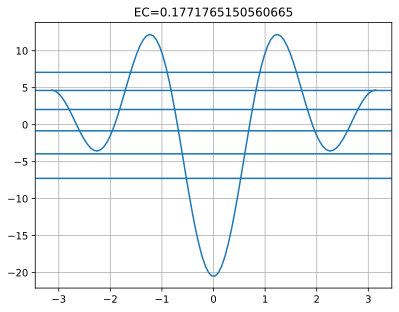

[np.float64(3.315136529503849), np.float64(3.1110830715368905)]


In [109]:
N = 1
M = 3
EC_shunt = 0.18 * 1

# choose sparse: 100/100, 100/10, 100/5, 100/3
# choose dense: 100/2

# nmon = Nmon(N=N, M=M, EJN=100*EC_shunt, EJM=100*EC_shunt, EC_shunt=EC_shunt)
nmon = Nmon(N=N, M=M, EJN=48*EC_shunt, EJM=22*EC_shunt, EC_shunt=EC_shunt)

nmon.hamiltonian_calc(flux=0.0, ng=[0.0, 0, 0, 0], num_levels=6, make_plot=True, just_H=False, cutoff=8)#compute_cutoff(nmon.EJN, nmon.EJM, nmon.EC_total, cutoff_space=[2, 8]))

print(nmon.transition_freqs)

In [76]:
# eval, evec = spla.eigsh(nmon.H, which='SA')
# eval

In [77]:
# import numpy as np
# from numba import njit

# @njit
# def compute_eigh(H):
#     return np.linalg.eigh(H)

In [78]:
# nmon.H_arr = np.absolute(nmon.H_arr)
# eigenvalues, eigenvectors = compute_eigh(nmon.H_arr)
# eigenvalues[:3]

In [79]:
nmon.nmon_circ.sym_hamiltonian(return_expr=True)

(76.072556*n2**2 + 76.072556*n_g2**2 + 75.836321*n1**2 + 75.836321*n3**2 + 75.836321*n_g1**2 + 75.836321*n_g3**2 + 76.072556*n2*n3 + 76.072556*n2*n_g3 + 76.072556*n3*n_g2 + 76.072556*n_g2*n_g3 + 151.672642*n1*n_g1 + 151.672642*n3*n_g3 + 152.145112*n2*n_g2 - 151.200171*n1*n2 - 151.200171*n1*n_g2 - 151.200171*n2*n_g1 - 151.200171*n_g1*n_g2 - 75.600086*n1*n3 - 75.600086*n1*n_g3 - 75.600086*n3*n_g1 - 75.600086*n_g1*n_g3) + (-8.64*cos(θ1 + θ2) - 3.96*cos(θ1) - 3.96*cos((2πΦ_{1}) - θ3) - 3.96*cos(θ2 - θ3))

In [80]:
from sympy import symbols, expand, simplify
from sympy import N

# Assume `hamiltonian_expr` is your symbolic Hamiltonian
hamiltonian_expr = nmon.nmon_circ.sym_hamiltonian(return_expr=True)

# Identify the variables
free_symbols = hamiltonian_expr.free_symbols
n_vars = sorted([s for s in free_symbols if str(s).startswith('n') and not str(s).startswith('n_g')], key=lambda x: str(x))
n_g_vars = sorted([s for s in free_symbols if str(s).startswith('n_g')], key=lambda x: str(x))

# Prepare results
coefficients = {}

# Substitute n_g = 0
hamiltonian_expr = hamiltonian_expr.subs({n_g: 0 for n_g in n_g_vars})

# Differentiate wrt each n_i to isolate its coefficient
for n in n_vars:
    coeff = simplify(hamiltonian_expr.diff(n))  # Take derivative wrt n_i
    coeff = simplify(coeff.diff(n))  # Take derivative wrt n_i
    
    numeric_coeff = N(coeff, 50)  # Compute to 50 decimal places
    # print(f"High-precision numeric coefficient: {numeric_coeff}")

    coefficients[str(n)] = numeric_coeff/2

# Display results
for n, coeff in coefficients.items():
    print(f"Coefficient of {n}: {coeff}")


Coefficient of n1: 75.836320996284484863281250000000000000000000000000
Coefficient of n2: 76.072556018829345703125000000000000000000000000000
Coefficient of n3: 75.836320996284484863281250000000000000000000000000


In [81]:
from sympy import symbols, cos, expand, simplify, expand_trig

# Assume `hamiltonian_expr` is your symbolic Hamiltonian
hamiltonian_expr = nmon.nmon_circ.sym_hamiltonian(return_expr=True)

# Expand trigonometric terms to make cosines explicit
expanded_hamiltonian = expand_trig(hamiltonian_expr)

# Find all cosine terms and extract coefficients
cosine_terms = [term for term in expanded_hamiltonian.args if term.has(cos)]
coefficients = {}

# Loop through the cosine terms and extract coefficients
for term in cosine_terms:
    cos_part = term.args[0] if term.has(cos) else term
    coeff = term.coeff(cos(cos_part))
    coefficients[str(cos_part)] = simplify(coeff)

# Display results
for cos_arg, coeff in coefficients.items():
    print(f"Coefficient of cos({cos_arg}): {coeff}")


Coefficient of cos(-3.960000): 0
Coefficient of cos(-8.640000): 0


In [82]:
Matr = nmon.nmon_circ.transformation_matrix
Matr_inv = np.linalg.inv(Matr)
Matr, Matr_inv, nmon.sym_hamiltonian

(array([[1, 1, 0],
        [1, 0, 1],
        [1, 0, 0]]),
 array([[ 0.,  0.,  1.],
        [ 1., -0., -1.],
        [-0.,  1., -1.]]),
 (-3.96*cos(θ1) - 3.96*cos((2πΦ_{1}) - θ3) - 8.64*cos(θ1 + θ2) - 3.96*cos(θ2 - θ3)) + (75.836321*n1**2 - 151.200171*n1*n2 - 75.600086*n1*n3 + 151.672642*n1*n_g1 - 151.200171*n1*n_g2 - 75.600086*n1*n_g3 + 76.072556*n2**2 + 76.072556*n2*n3 - 151.200171*n2*n_g1 + 152.145112*n2*n_g2 + 76.072556*n2*n_g3 + 75.836321*n3**2 - 75.600086*n3*n_g1 + 76.072556*n3*n_g2 + 151.672642*n3*n_g3 + 75.836321*n_g1**2 - 151.200171*n_g1*n_g2 - 75.600086*n_g1*n_g3 + 76.072556*n_g2**2 + 76.072556*n_g2*n_g3 + 75.836321*n_g3**2))

In [83]:
# size = nmon.H.shape[0]
# nmon.H = np.real(nmon.H)
# for i in range(size):
#     for j in range(size):
#         print(round(nmon.H[i,j], 2), end=' ')
#         pass
#     print()

In [84]:
# import numpy as np

# # in n - basis

# def construct_hamiltonian(n_cut, Phi_1=0.0, n_g1=0.0, n_g2=0.0, n_g3=0.0):
#     # Define the basis states
#     basis = []
#     for n1 in range(-n_cut, n_cut + 1):
#         for n2 in range(-n_cut, n_cut + 1):
#             for n3 in range(-n_cut, n_cut + 1):
#                 basis.append((n1, n2, n3))
    
#     # Map basis states to indices
#     n1n2n3_to_index = { (n1, n2, n3): idx for idx, (n1, n2, n3) in enumerate(basis) }
    
#     # Initialize the Hamiltonian matrix
#     dim = len(basis)
#     H = np.zeros((dim, dim), dtype=complex)
    
#     # Constants from the Hamiltonian
#     # Charging energy coefficients
#     E_n1_n1 = 16.74370801448822021484375
#     E_n1_n2 = -33.016467
#     E_n1_n3 = -16.508233
#     E_n1_ng1 = 33.491767
#     E_n1_ng2 = -33.016467
#     E_n1_ng3 = -16.508233
    
#     E_n2_n2 = 16.974833011627197265625
#     E_n2_n3 = 16.983533
#     E_n2_ng1 = -33.016467
#     E_n2_ng2 = 33.967067
#     E_n2_ng3 = 16.983533
    
#     E_n3_n3 = 16.74370801448822021484375
#     E_n3_ng1 = -16.508233
#     E_n3_ng2 = 16.983533
#     E_n3_ng3 = 33.491767
    
#     E_ng1_ng1 = 16.745883
#     E_ng1_ng2 = -33.016467
#     E_ng1_ng3 = -16.508233
    
#     E_ng2_ng2 = 16.983533
#     E_ng2_ng3 = 16.983533
    
#     E_ng3_ng3 = 16.745883
    
#     # Charging energy terms (diagonal)
#     for idx, (n1, n2, n3) in enumerate(basis):
#         H_c = (
#             E_n1_n1 * n1**2 +
#             E_n2_n2 * n2**2 +
#             E_n3_n3 * n3**2 +
#             E_n1_n2 * n1 * n2 +
#             E_n1_n3 * n1 * n3 +
#             E_n2_n3 * n2 * n3
#             # Offset charges are zero in this example, but can be included as needed
#         )
#         H[idx, idx] = H_c
    
#     # Potential energy terms (off-diagonal)
#     # V1: -18.0 * cos(θ1)
#     for idx, (n1, n2, n3) in enumerate(basis):
#         coeff = -9.0  # -18.0 / 2
#         for delta_n1 in [-1, 1]:
#             n1p = n1 + delta_n1
#             if -n_cut <= n1p <= n_cut:
#                 idxp = n1n2n3_to_index.get((n1p, n2, n3))
#                 if idxp is not None:
#                     H[idx, idxp] += coeff
    
#     # V2: -18.0 * cos((2πΦ_1) - θ3)
#     phi = 2 * np.pi * Phi_1
#     exp_plus = np.exp(-1j * phi)
#     exp_minus = np.exp(1j * phi)
#     for idx, (n1, n2, n3) in enumerate(basis):
#         coeff = -9.0
#         # Shift n3 by +1 with exp(-i * phi)
#         n3p = n3 + 1
#         if -n_cut <= n3p <= n_cut:
#             idxp = n1n2n3_to_index.get((n1, n2, n3p))
#             if idxp is not None:
#                 H[idx, idxp] += coeff * exp_minus
#         # Shift n3 by -1 with exp(i * phi)
#         n3p = n3 - 1
#         if -n_cut <= n3p <= n_cut:
#             idxp = n1n2n3_to_index.get((n1, n2, n3p))
#             if idxp is not None:
#                 H[idx, idxp] += coeff * exp_plus
    
#     # V3: -0.18 * cos(θ1 + θ2)
#     for idx, (n1, n2, n3) in enumerate(basis):
#         coeff = -0.09 * 100  # -0.18 / 2
#         for delta in [-1, 1]:
#             n1p = n1 + delta
#             n2p = n2 + delta
#             if -n_cut <= n1p <= n_cut and -n_cut <= n2p <= n_cut:
#                 idxp = n1n2n3_to_index.get((n1p, n2p, n3))
#                 if idxp is not None:
#                     H[idx, idxp] += coeff
    
#     # V4: -18.0 * cos(θ2 - θ3)
#     for idx, (n1, n2, n3) in enumerate(basis):
#         coeff = -9.0  # -18.0 / 2
#         for delta_n2 in [-1, 1]:
#             delta_n3 = -delta_n2
#             n2p = n2 + delta_n2
#             n3p = n3 + delta_n3
#             if -n_cut <= n2p <= n_cut and -n_cut <= n3p <= n_cut:
#                 idxp = n1n2n3_to_index.get((n1, n2p, n3p))
#                 if idxp is not None:
#                     H[idx, idxp] += coeff
    
#     # Ensure the Hamiltonian is Hermitian
#     H = (H + H.conj().T) / 2
#     return H.real  # Return the real part

# # Example usage
# n_cut = 7  # Charge basis cutoff
# Phi_1 = 0.0  # External flux Φ_1 in units of Φ/Φ0
# n_g1 = 0.0  # Offset charge n_g1
# n_g2 = 0.0  # Offset charge n_g2
# n_g3 = 0.0  # Offset charge n_g3

# hamiltonian_matrix = construct_hamiltonian(n_cut, Phi_1, n_g1, n_g2, n_g3)
# print("Hamiltonian matrix shape:", hamiltonian_matrix.shape)
# # print("Hamiltonian matrix diagonal elements (rounded):")
# # print(np.round(np.diag(hamiltonian_matrix), 2))

# # Solve eigenvalue problem
# eigenvalues, eigenvectors = np.linalg.eigh(hamiltonian_matrix)
# print("Eigenvalues (sorted):", sorted(eigenvalues))

# # Compute the ratio as requested
# max_diag = np.max(np.diag(hamiltonian_matrix))
# size = hamiltonian_matrix.shape[0]
# off_diag_element = hamiltonian_matrix[0, 1]
# ratio = max_diag / size**2 / off_diag_element
# print("Computed Ratio:", ratio)


In [85]:
import numpy as np

# in p - basis

def construct_hamiltonian(n_cut, Phi_1=0.0, n_g1=0.0, n_g2=0.0, n_g3=0.0, coupling_coef=1):
    basis_states = []
    state_index = {}
    idx = 0
    for n1 in range(-3, 4):
        for n2 in range(-3, 4):
            for n3 in range(-3, 4):
                p1 = n2
                p2 = n1 - n2
                p3 = n3
                basis_states.append((p1, p2, p3))
                state_index[(p1, p2, p3)] = idx
                idx += 1

    
    dim = len(basis_states)
    H = np.zeros((dim, dim), dtype=complex)
        
    for idx, (p1, p2, p3) in enumerate(basis_states):
        n1 = p1 + p2
        n2 = p1
        n3 = p3
        H_C = (
            16.745883 * n1**2
            - 33.016467 * n1 * n2
            - 16.508233 * n1 * n3
            + 16.983533 * n2**2
            + 16.983533 * n2 * n3
            + 16.745883 * n3**2
            # Offset charges can be included here if needed
        )
        H[idx, idx] = H_C

        
    coeff = -9.0  # -18.0 / 2
    for idx, (p1, p2, p3) in enumerate(basis_states):
        for delta_p2 in [-1, 1]:
            p2p = p2 + delta_p2
            if -6 <= p2p <= 6:
                key = (p1, p2p, p3)
                idxp = state_index.get(key)
                if idxp is not None:
                    H[idx, idxp] += coeff
    
    coeff = -9.0
    phi = 2 * np.pi * Phi_1
    exp_plus = np.exp(-1j * phi)
    exp_minus = np.exp(1j * phi)
    for idx, (p1, p2, p3) in enumerate(basis_states):
        for delta_p3 in [-1, 1]:
            p3p = p3 + delta_p3
            if -3 <= p3p <= 3:
                key = (p1, p2, p3p)
                idxp = state_index.get(key)
                if idxp is not None:
                    if delta_p3 == 1:
                        H[idx, idxp] += coeff * exp_minus
                    else:
                        H[idx, idxp] += coeff * exp_plus

    
    coeff = -0.09*100  # -0.18 / 2
    for idx, (p1, p2, p3) in enumerate(basis_states):
        for delta_p1 in [-1, 1]:
            p1p = p1 + delta_p1
            if -3 <= p1p <= 3:
                key = (p1p, p2, p3)
                idxp = state_index.get(key)
                if idxp is not None:
                    H[idx, idxp] += coeff
    
    coeff = -9.0 * coupling_coef
    for idx, (p1, p2, p3) in enumerate(basis_states):
        for delta in [-1, 1]:
            p1p = p1 - delta
            p2p = p2 + delta
            p3p = p3 + delta
            if -3 <= p1p <= 3 and -6 <= p2p <= 6 and -3 <= p3p <= 3:
                key = (p1p, p2p, p3p)
                idxp = state_index.get(key)
                if idxp is not None:
                    H[idx, idxp] += coeff
    
    # Ensure the Hamiltonian is Hermitian
    H = (H + H.conj().T) / 2
    return H.real  # Return the real part

# Example usage
n_cut = 7  # Charge basis cutoff
Phi_1 = 0.0  # External flux Φ_1 in units of Φ/Φ0
n_g1 = 0.0  # Offset charge n_g1
n_g2 = 0.0  # Offset charge n_g2
n_g3 = 0.0  # Offset charge n_g3

hamiltonian_matrix = construct_hamiltonian(n_cut, Phi_1, n_g1, n_g2, n_g3, coupling_coef=1)
print("Hamiltonian matrix shape:", hamiltonian_matrix.shape)
# print("Hamiltonian matrix diagonal elements (rounded):")
# print(np.round(np.diag(hamiltonian_matrix), 2))

# Solve eigenvalue problem
eigenvalues, eigenvectors = np.linalg.eigh(hamiltonian_matrix)
print("Eigenvalues (sorted):", sorted(eigenvalues))

# Compute the ratio as requested
max_diag = np.max(np.diag(hamiltonian_matrix))
size = hamiltonian_matrix.shape[0]
off_diag_element = hamiltonian_matrix[0, 1]
ratio = max_diag / size**2 / off_diag_element
print("Computed Ratio:", ratio)


Hamiltonian matrix shape: (343, 343)
Eigenvalues (sorted): [np.float64(-41.04547425220068), np.float64(-33.599358779478806), np.float64(-24.46817092328691), np.float64(-15.79072971877653), np.float64(-15.51632649192221), np.float64(-14.398100143147731), np.float64(-8.80828986562658), np.float64(-8.051629482699576), np.float64(-4.9249976595168246), np.float64(-1.4793185239389262), np.float64(-0.66786963361513), np.float64(0.9664766847200801), np.float64(2.894078212893299), np.float64(4.106135011063287), np.float64(4.194062764234717), np.float64(4.2619883505468765), np.float64(6.240590227099268), np.float64(7.881609993947394), np.float64(9.730171591894715), np.float64(10.24770920318022), np.float64(10.669660284499766), np.float64(10.878556081918806), np.float64(12.943036112639001), np.float64(15.734902817450632), np.float64(16.329031235175524), np.float64(16.91405492893328), np.float64(17.54539330103427), np.float64(17.575700756242643), np.float64(18.300485239194), np.float64(18.55341612

In [86]:
H_min_V = construct_hamiltonian(n_cut, Phi_1, n_g1, n_g2, n_g3, coupling_coef=0)

In [87]:
V = hamiltonian_matrix - H_min_V
V

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [88]:
# Diagonalize the unperturbed Hamiltonian
# _, psi0 = np.linalg.eigh(H_min_V)
_, psi0 = tf.linalg.eigh(H_min_V)
psi0_dag = np.conjugate(psi0).T

# Transform V into the eigenbasis of H0
V_tilde = psi0_dag @ V @ psi0
H_min_V_tilde = psi0_dag @ H_min_V @ psi0

In [89]:
H_tilde = H_min_V_tilde + V_tilde
evals_tilde, psi0 = tf.linalg.eigh(H_tilde)
np.round(evals_tilde, 2)[:6]

array([-41.05, -33.6 , -24.47, -15.79, -15.52, -14.4 ])

In [90]:
# Calculate sparsity level
sparse_matrix = nmon.H

total_elements = sparse_matrix.shape[0] * sparse_matrix.shape[1]  # Total number of elements in the matrix
non_zero_elements = sparse_matrix.nnz  # Number of non-zero elements
sparsity_level = 1 - (non_zero_elements / total_elements)  # Fraction of zero elements

print(f"Sparsity level: {sparsity_level:.6f}")

Sparsity level: 0.998309


In [91]:
# # eigenvalues = tf.linalg.eigvalsh(nmon.H)
# nmon.H_arr = np.absolute(nmon.H_arr)
# eigenvalues, eigenvectors = tf.linalg.eigh(nmon.H_arr)
# eigenvalues

In [92]:
# nmon.H = scipy.sparse.csr_matrix(np.absolute(nmon.H))
# eval, evec = spla.eigsh(nmon.H, which='SA', k=3)
# eval

                    sp | tf                                                 

100 1,   cut=2 : 0.0 s | 0.0 s  ||| [-14.82436878,  -7.3115815 ,   1.85772136] !!!!!!!! tf
100 1,   cut=4 : 0.0 s | 0.0 s  ||| [-15.52048935, -10.56065419,  -5.47046177]
100 1,   cut=5 : 0.0 s | 0.0 s  ||| [-15.53396771, -10.68407465,  -5.97106947]
100 1,   cut=6 : 0.0 s | 0.0 s  ||| [-15.53494184, -10.6967349 ,  -6.0452567 ]
100 1,   cut=7 :  32 s | 0.0 s  ||| [-15.5349854 , -10.69747533,  -6.05111544] !!!!!!!! tf
100 1,   cut=8 : >30 s | 0.0 s  ||| [-15.5349854 , -10.69747533,  -6.05111544]

Reducing cutoff on the external nodes threw the progress back to the level of the uniform cutoff of that magnitude

In [93]:

# # TODO check for ratio, 10
# # TODO check for ratio, ratio again

# # Generate all combinations of ng values
# ng_probes = [0, 0.25, 0.5, 0.75]
# ng_combinations = np.array(list(combinations_with_replacement(ng_probes, N + M - 1)))

# ratios_list = np.linspace(1, 100, 10)

# w01_min_list=np.zeros_like(ratios_list)
# w01_max_list=np.zeros_like(ratios_list)

# ng_max_list=np.empty_like(ratios_list, dtype=object)
# ng_min_list=np.empty_like(ratios_list, dtype=object)

# for i, ratio in enumerate(ratios_list):
#     w01_min = np.inf
#     w01_max = 0
#     ng_min = 0
#     ng_max = 0

#     nmon = Nmon(N=N, M=M, EJN=ratio*EC_shunt, EJM=ratio*EC_shunt, EC_shunt=EC_shunt)

#     for ng in tqdm(ng_combinations):
#         nmon.hamiltonian_calc(flux=0, ng=ng, num_levels=3, make_plot=False, just_H=False,
#                                 cutoff=compute_cutoff(nmon.EJN, nmon.EJM, nmon.EC_total, cutoff_space=[2, 8]))
#         if nmon.transition_freqs[0] < w01_min:
#             w01_min = nmon.transition_freqs[0]
#             ng_min = ng
        
#         if nmon.transition_freqs[0] > w01_max:
#             w01_max = nmon.transition_freqs[0]
#             ng_max = ng

#     w01_min_list[i] = w01_min
#     w01_max_list[i] = w01_max

#     ng_max_list[i] = ng_max
#     ng_min_list[i] = ng_min

In [94]:
# print(ng_max_list)
# print(ng_min_list)

In [95]:

# w01_disp_ng = []
# for i, ratio in enumerate(tqdm(ratios_list)):    
#     nmon = Nmon(N=N, M=M, EJN=ratio*EC_shunt, EJM=ratio*EC_shunt, EC_shunt=EC_shunt)

#     nmon.hamiltonian_calc(flux=0.0, ng=[0.0, 0, 0, 0], num_levels=3, make_plot=False, just_H=True, cutoff=compute_cutoff(nmon.EJN, nmon.EJM, nmon.EC_total, cutoff_space=[2, 8]))

#     # nmon.H_arr = nmon.nmon_circ.hamiltonian().toarray() # sparse array

#     # nmon.H_arr = (np.real(nmon.H_arr))
#     # nmon.bound_state_energies, nmon.H_arr

#     # print(nmon.H_arr)

#     EJM_idx, EJN_idx = np.where(nmon.H_arr[0] != 0)[0][1:][0], np.where(nmon.H_arr[0] != 0)[0][1:][-1]
#     # np.absolute(max(np.diag(nmon.H_arr)) / nmon.H_arr.shape[0]**2 / (M*nmon.H_arr[0, EJM_idx] + N * nmon.H_arr[0, EJN_idx]) )
#     up_value = max(np.diag(nmon.H_arr)) / (nmon.H_arr.shape[0]**(1/3) - 1 )/2
#     EJM_sum = M*nmon.H_arr[0, EJM_idx]
#     EJN_sum = N*nmon.H_arr[0, EJN_idx] 
#     w01_disp_ng.append(np.absolute( up_value / (EJM_sum)) / 2e4 + np.absolute( up_value / (EJN_sum)) / 2e4 )

In [96]:
# plt.plot(ratios_list, w01_max_list)
# plt.plot(ratios_list, w01_min_list)

# plt.yscale('log')

# plt.show()

# plt.plot(ratios_list, [w01_max_list[i] - w01_min_list[i] for i, ratio in enumerate(ratios_list)])
# plt.plot(ratios_list, w01_disp_ng, label='coef')
# plt.legend()
# plt.yscale('log')

# plt.show()

# plt.plot(ratios_list, [(w01_max_list[i] - w01_min_list[i])/w01_min_list[i] for i, ratio in enumerate(ratios_list)])
# plt.plot(ratios_list, [(w01_max_list[i] - w01_min_list[i])/w01_max_list[i]  for i, ratio in enumerate(ratios_list)])

# plt.plot(ratios_list, [w01_disp_ng[i]/w01_max_list[i]  for i, ratio in enumerate(ratios_list)], label='coef')
# # plt.plot(ratios_list, [w01_disp_ng[i]/w01_min_list[i]  for i, ratio in enumerate(ratios_list)], label='coef')
# plt.legend()
# plt.yscale('log')
# # plt.xscale('log')
# plt.show()

In [97]:
# size = nmon.H.shape[0]
# nmon.H = np.real(nmon.H)
# for i in range(size):
#     for j in range(size):
#         print(round(nmon.H[i,j], 1), end=' ')
#         pass
#     print()



                  sp | tf                                                 | OLD ng coef

1 1,   cut=1 : 0.0 s | 0.0 s  ||| [-0.02187445,  0.71970418,  0.74154947] | 44.455824355414215
1 1,   cut=2 : 0.0 s | 0.0 s  ||| [-0.02195492,  0.71594954,  0.73786556] | 8.296523764504824     !!!!!!!! tf
1 1,   cut=3 : 0.2 s | 0.0 s  ||| [-0.02195495,  0.71594709,  0.73786312] | 2.479193733868309 
1 1,   cut=4 : 2.4 s | 0.1 s  ||| [-0.02195495,  0.71594709,  0.73786312] | 0.9757108226154014
1 1,   cut=5 : 8.7 s | 1.0 s  ||| [-0.02195495,  0.73786312,  0.71594709] | 0.45734095460298807 

5 5,   cut=1 : 0.0 s | 0.0 s  ||| [-0.37485497,  1.08739994,  0.71618909] | 1.778427617825579
5 5,   cut=2 : 0.0 s | 0.0 s  ||| [-0.3914459 ,  0.62486178,  1.00709703] | 0.33189727574908084 
5 5,   cut=3 : 0.2 s | 0.0 s  ||| [-0.39160497,  0.62345754,  1.0055348 ] | 0.0991786041577372    !!!!!!!! tf
5 5,   cut=4 : 1.0 s | 0.2 s  ||| [-0.39160539,  0.62345285,  1.00552898] | 0.03903270491798253  

10 10, cut=3 : 0.2 s | 0.0 s  ||| [-1.07470807,  0.34501917,  1.30896177] | 0.024798031487033613
10 10, cut=4 : 0.8 s | 0.2 s  ||| [-1.07473195,  0.34478686,  1.30844558] | 0.009759506637548408  !!!!!!!! tf
10 10, cut=5 : 1.7 s | 1.0 s  ||| [-1.07473204,  0.34478581,  1.30844285] | 0.004574533743621237
10 10, cut=8 : 8.6 s | 51.8 s ||| [-1.07473204,  0.3447858 ,  1.30844284] |

20 20, cut=4 : 0.4 s | 0.1 s  ||| [-2.7541147 , -0.67810548,  1.14000568] | !!!!!!!! tf
20 20, cut=5 : 1.4 s | 1.0 s  ||| [-2.75412547, -0.67823689,  1.13934428] |

30 30, cut=4 : 0.4 s | 0.2 s  ||| [-4.91029484, -2.30872545,  0.07976778] |
30 30, cut=5 : 0.8 s | 1.1 s  ||| [-4.91043696, -2.31037688,  0.07111349] | !!!!!!!! sp ------------------
30 30, cut=6 : 1.0 s | 4.6 s  ||| [-4.91043907, -2.31040787,  0.07090534] |

40 40, cut=4 : 0.2 s | 0.1 s  ||| [-7.76641081, -4.68650931, -1.78569123] | 
40 40, cut=5 : 0.3 s | 1.0 s  ||| [-7.76724671, -4.69544377, -1.82902331] | 
40 40, cut=6 : 0.6 s | 4.6 s  ||| [-7.76726834, -4.69574933, -1.83102603] | !!!!!!!! sp
40 40, cut=7 : 0.8 s | 16.4 s ||| [-7.76726866, -4.69575488, -1.83107092] |

80 80, cut=6 : 0.5 s | 4.6 s  ||| [-28.29882564, -23.53750421, -18.92986578] |
80 80, cut=7 : 0.4 s | 17.2 s ||| [-28.29899763, -23.54007889, -18.94772354] | !!!!!!!! sp
80 80, cut=8 : 0.5 s | 51.5 s ||| [-28.29900386, -23.54019615, -18.94877076] |

100 100, cut=8 : 0.4 s | 51.2 s ||| [-41.55104615, -36.14952418, -30.90423693] | !!!!!!!! sp
100 100, cut=9 : 0.9 s | > 60 s ||| [-41.55104765, -36.14955616, -30.90456352] |

In [98]:
# print("EC", nmon.EC_total)
# print("EC shunt", nmon.EC_shunt)
# print("total C", nmon.C_total)

# print('total L', nmon.L_total)
# print('Expected freq', 1/ np.sqrt(nmon.L_total*nmon.C_total)/1e9)

# print("EJM", nmon.EJM)
# print("EJN", nmon.EJN)
# print("ECJM", nmon.ECJM)
# print("ECJN", nmon.ECJN)

# print(nmon.bound_state_energies[1] - nmon.bound_state_energies[0])
# print(nmon.bound_state_energies[2] - nmon.bound_state_energies[1])

# # print(nmon.bound_state_energies[2] - nmon.bound_state_energies[0])
# # print(nmon.bound_state_energies[4] - nmon.bound_state_energies[2])
# # print(nmon.bound_state_energies[4] - nmon.bound_state_energies[2])
# print(nmon.ready_dominating_transitions)
# print(nmon.transition_freqs)
# print(nmon.relative_anharm)

In [99]:
from nmon import *

EC_shunt = 0.18

N = 1
M = 3

N_EJN = 20
N_EJM = 20
N_flux = 5

flux_list = np.linspace(0, 0.5, N_flux)
EJM_list = np.linspace(1 * EC_shunt, 60 * EC_shunt, N_EJN)
EJN_list = np.linspace(1 * EC_shunt, 60 * EC_shunt, N_EJM)

# Generate all combinations of ng values
ng_probes = [0, 0.25, 0.5, 0.75]
# ng_combinations = np.array(list(combinations_with_replacement(ng_probes, N + M - 1)))
ng_combinations = [[0,0,0],
                   [0, 0.25, 0.5],
                   [0.0, 0.5,0.25],
                   [0.5, 0.25,0.0],
                   [0.5, 0.25, 0.5],
                   [0.25, 0.5, 0.25],
                   [0.25, 0.25, 0.25],
                   [0.5, 0.5, 0.5]
                   ]

relative_anharm_list = np.full((N_EJM, N_EJN, N_flux), None)
w01_list = np.full((N_EJM, N_EJN, N_flux), None)
w12_list = np.full((N_EJM, N_EJN, N_flux), None)
w01_variation_list = np.full_like(w01_list, None)
w01_variation_list_precise = np.full_like(w01_list, None)

# To store the ng values corresponding to min and max w01
w01_ng_min = np.empty((N_EJM, N_EJN, N_flux), dtype=object)
w01_ng_max = np.empty((N_EJM, N_EJN, N_flux), dtype=object)

for i in range(N_EJM):
    for j in tqdm(range(N_EJN)):
        nmon = Nmon(N=N, M=M, EJM=EJM_list[i], EJN=EJN_list[j], EC_shunt=EC_shunt)
        for k, flux in enumerate(flux_list):

            w01_local = []
            local_ng_values = []
            local_relative_anharm = []
            local_w12 = []

            # Iterate over all ng combinations
            for ng in ng_combinations:
                try:
                    nmon.hamiltonian_calc(flux=flux, ng=ng, num_levels=6, make_plot=False, just_H=False,
                                        cutoff=compute_cutoff(nmon.EJN, nmon.EJM, nmon.EC_total, cutoff_space=[2, 8]))
                except Exception:
                    continue

                # Store w01 for the current ng
                w01_local.append(nmon.transition_freqs[0])
                local_ng_values.append(tuple(ng))

                if len(nmon.transition_freqs) > 1:
                    local_w12.append( nmon.transition_freqs[1])
                    local_relative_anharm.append(nmon.relative_anharm)

            try:
                EJM_idx, EJN_idx = np.where(nmon.H_arr[0] != 0)[0][1:][0], np.where(nmon.H_arr[0] != 0)[0][1:][-1]

                # np.absolute(max(np.diag(nmon.H_arr)) / nmon.H_arr.shape[0]**2 / (M*nmon.H_arr[0, EJM_idx] + N * nmon.H_arr[0, EJN_idx]) )
                up_value = max(np.diag(nmon.H_arr)) / (nmon.H_arr.shape[0]**(1/3) - 1 )/2
                EJM_sum = M*nmon.H_arr[0, EJM_idx]
                EJN_sum = N*nmon.H_arr[0, EJN_idx] 

                # Compute relative anharmonicity
                # Calculate w01 variation and store ng values for min and max w01
                max_idx = np.argmax(w01_local)
                min_idx = np.argmin(w01_local)

                w01_list[i, j, k] = w01_local[max_idx]  # Store the minimal w01 for any ng configuration

                w12_list[i, j, k] = local_w12[max_idx]
                relative_anharm_list[i, j, k] = local_relative_anharm[max_idx]

                w01_variation_list[i, j, k] = (np.absolute( up_value / (EJM_sum)) / 2e4 + np.absolute( up_value / (EJN_sum)) / 2e4) / w01_local[max_idx]
                w01_variation_list_precise[i, j, k] = (w01_local[max_idx] - w01_local[min_idx]) / w01_local[max_idx]
                w01_ng_min[i, j, k] = local_ng_values[min_idx]
                w01_ng_max[i, j, k] = local_ng_values[max_idx]

            except Exception:
                continue

# At the end, w01_ng_min and w01_ng_max store the ng values for which w01 is minimal or maximal.
np.save("./data_arrays/N={}_M={}_EC_shunt={}_EJM_list.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), EJM_list)
np.save("./data_arrays/N={}_M={}_EC_shunt={}_EJN_list.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), EJN_list)
np.save("./data_arrays/N={}_M={}_EC_shunt={}_flux_list.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), flux_list)
np.save("./data_arrays/N={}_M={}_EC_shunt={}_rel_anharm_list.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), relative_anharm_list)
np.save("./data_arrays/N={}_M={}_EC_shunt={}_w01_list.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), w01_list)
np.save("./data_arrays/N={}_M={}_EC_shunt={}_w01_variation_list.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), w01_variation_list)
np.save("./data_arrays/N={}_M={}_EC_shunt={}_w01_variation_list_precise.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), w01_variation_list_precise)
np.save("./data_arrays/N={}_M={}_EC_shunt={}_w01_ng_max.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), w01_ng_max)
np.save("./data_arrays/N={}_M={}_EC_shunt={}_w01_ng_min.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), w01_ng_min)



100%|██████████| 20/20 [07:28<00:00, 22.41s/it]


In [100]:
np.save("./data_arrays/N={}_M={}_EC_shunt={}_EJM_list.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), EJM_list)
np.save("./data_arrays/N={}_M={}_EC_shunt={}_EJN_list.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), EJN_list)
np.save("./data_arrays/N={}_M={}_EC_shunt={}_flux_list.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), flux_list)
np.save("./data_arrays/N={}_M={}_EC_shunt={}_rel_anharm_list.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), relative_anharm_list)
np.save("./data_arrays/N={}_M={}_EC_shunt={}_w01_list.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), w01_list)
np.save("./data_arrays/N={}_M={}_EC_shunt={}_w01_variation_list.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), w01_variation_list)
np.save("./data_arrays/N={}_M={}_EC_shunt={}_w01_variation_list_precise.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), w01_variation_list_precise)
np.save("./data_arrays/N={}_M={}_EC_shunt={}_w01_ng_max.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), w01_ng_max)
np.save("./data_arrays/N={}_M={}_EC_shunt={}_w01_ng_min.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), w01_ng_min)


In [106]:


EJM_list = np.load("./data_arrays/N={}_M={}_EC_shunt={}_EJM_list.npy".format(N, M, round(EC_shunt, 2)))
EJN_list = np.load("./data_arrays/N={}_M={}_EC_shunt={}_EJN_list.npy".format(N, M, round(EC_shunt, 2)))
flux_list = np.load("./data_arrays/N={}_M={}_EC_shunt={}_flux_list.npy".format(N, M, round(EC_shunt, 2)), allow_pickle=True)
relative_anharm_list_flux = np.load("./data_arrays/N={}_M={}_EC_shunt={}_rel_anharm_list.npy".format(N, M, round(EC_shunt, 2)), allow_pickle=True)
w01_list_flux = np.load("./data_arrays/N={}_M={}_EC_shunt={}_w01_list.npy".format(N, M, round(EC_shunt, 2)), allow_pickle=True)
w01_variation_list_flux = np.load("./data_arrays/N={}_M={}_EC_shunt={}_w01_variation_list.npy".format(N, M, round(EC_shunt, 2)), allow_pickle=True)
w01_variation_list_precise = np.load("./data_arrays/N={}_M={}_EC_shunt={}_w01_variation_list_precise.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), allow_pickle=True)
w01_ng_max_pickle = np.load("./data_arrays/N={}_M={}_EC_shunt={}_w01_ng_max.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), allow_pickle=True)
w01_ng_min_pickle = np.load("./data_arrays/N={}_M={}_EC_shunt={}_w01_ng_min.npy".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 )), allow_pickle=True)


In [107]:
flux_list = np.array(flux_list, dtype=float)
relative_anharm_list_flux = np.array(relative_anharm_list_flux, dtype=float)
w01_list_flux = np.array(w01_list_flux, dtype=float)
w01_variation_list_flux = np.array(w01_variation_list_flux, dtype=float)
w01_variation_list_precise = np.array(w01_variation_list_precise, dtype=float)

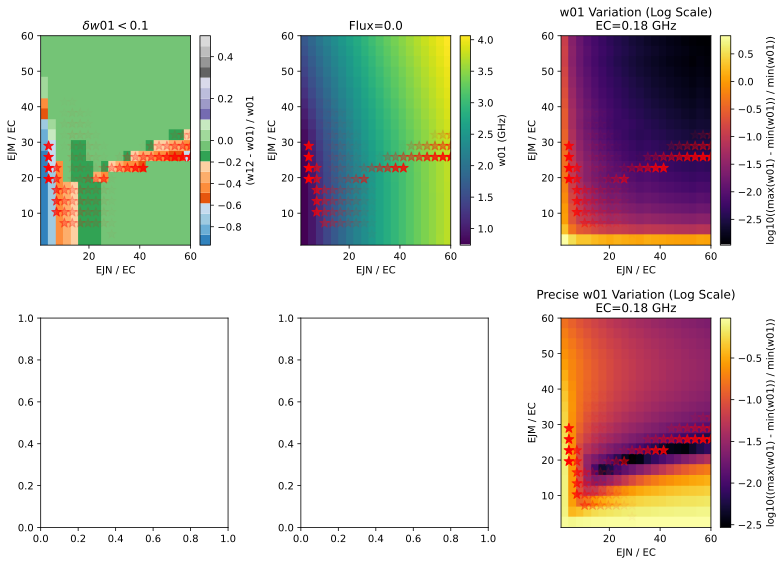

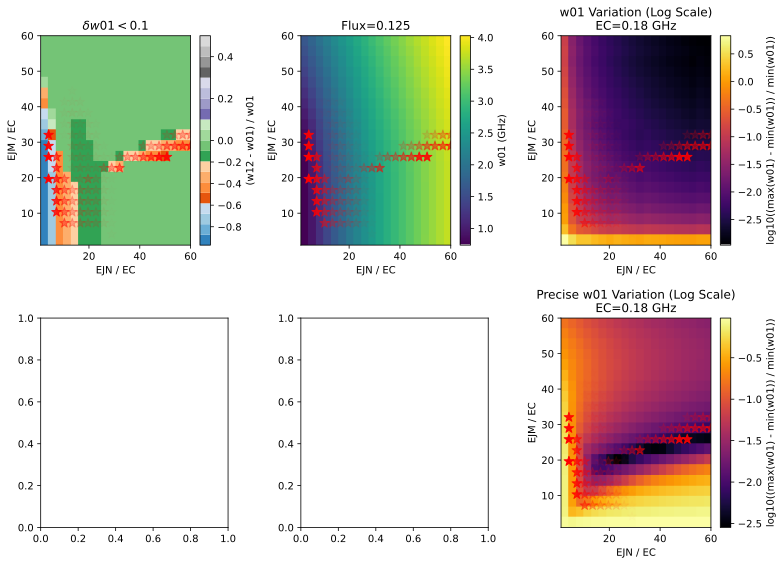

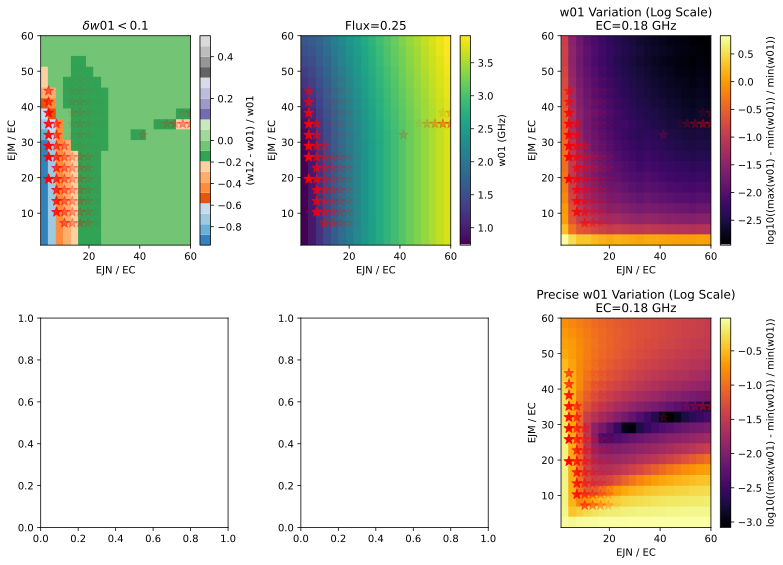

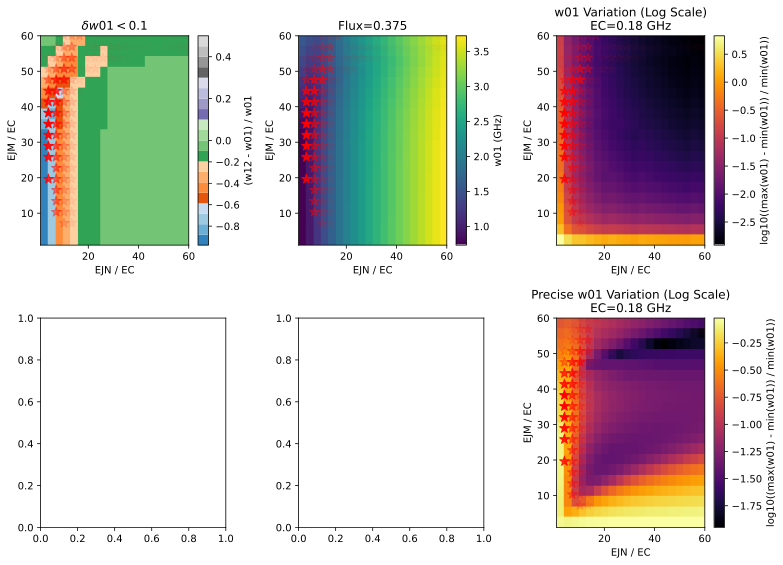

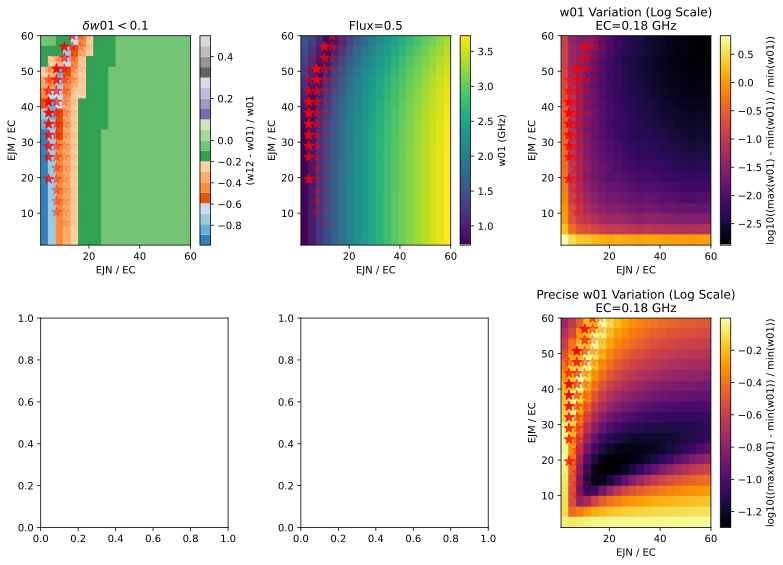

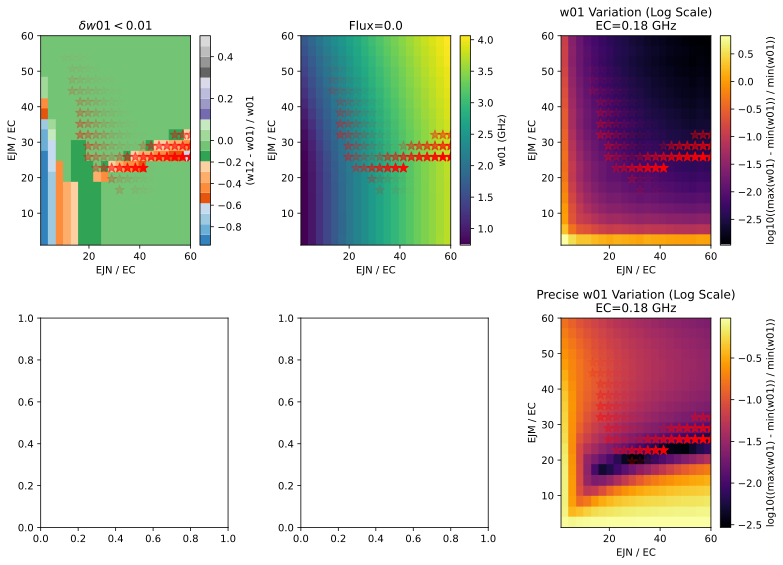

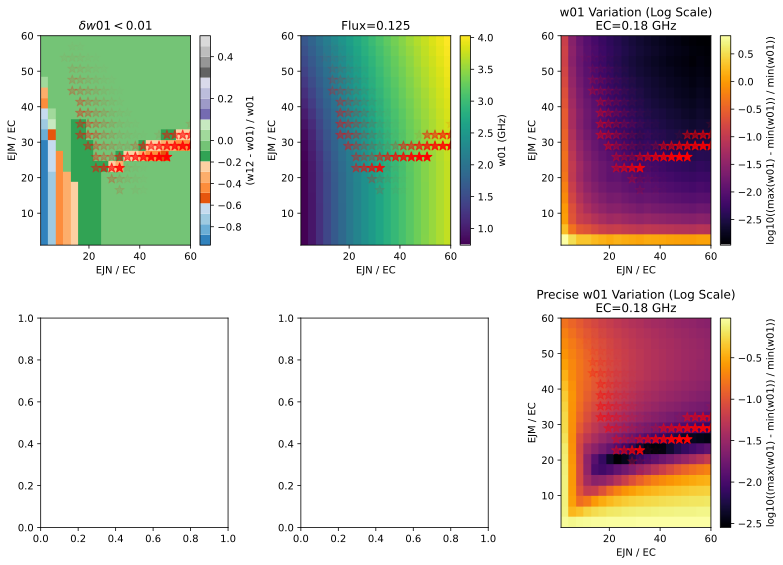

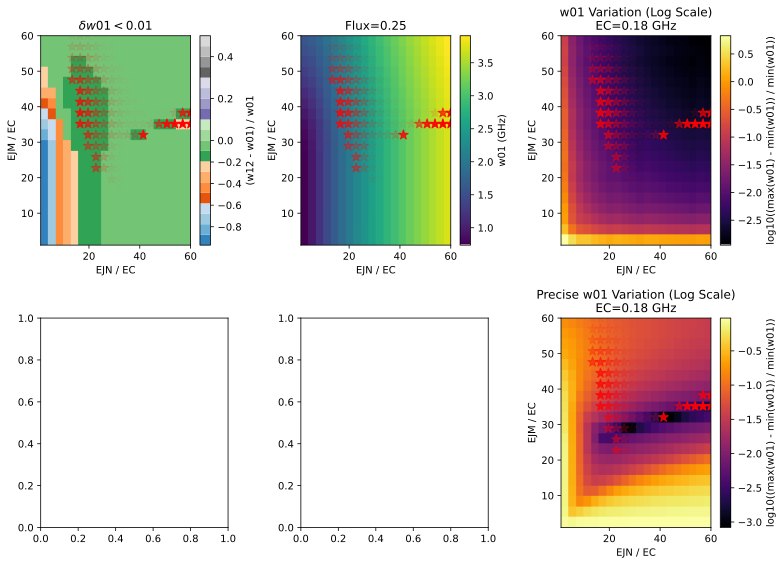

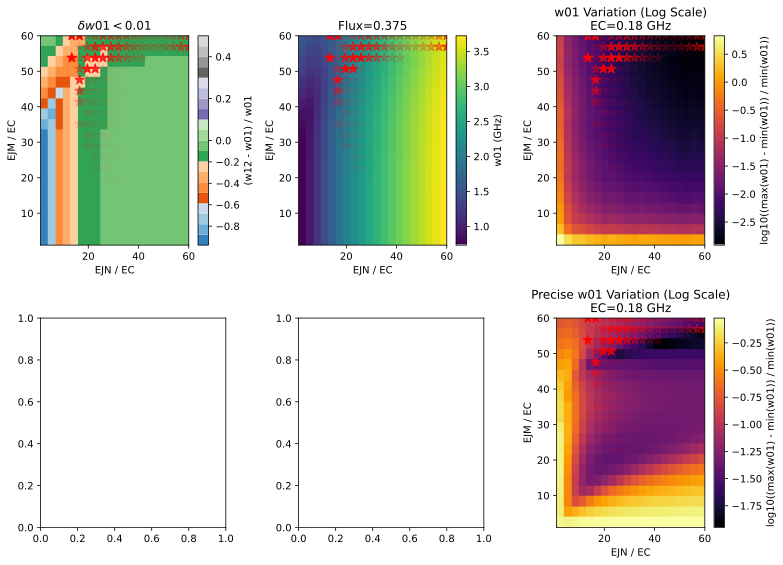

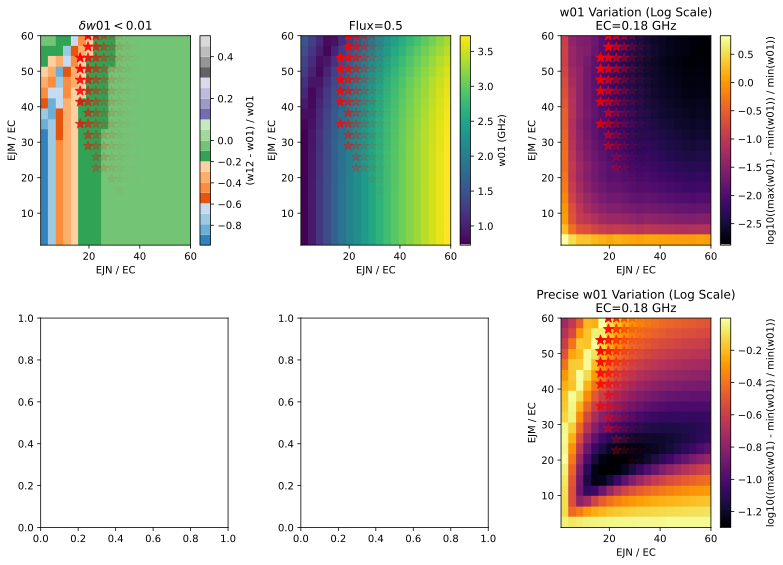

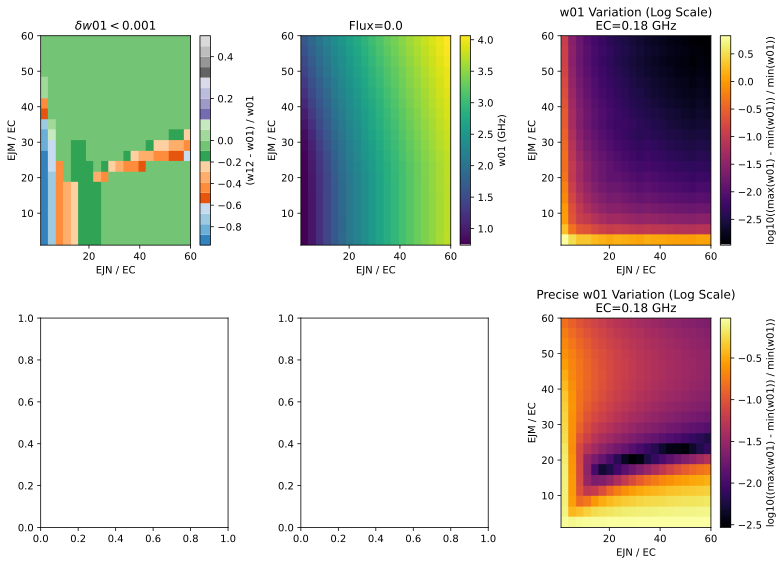

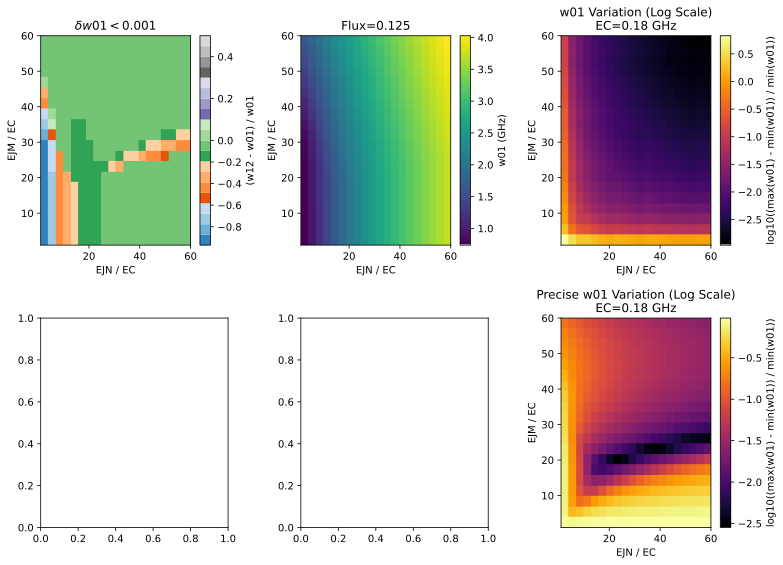

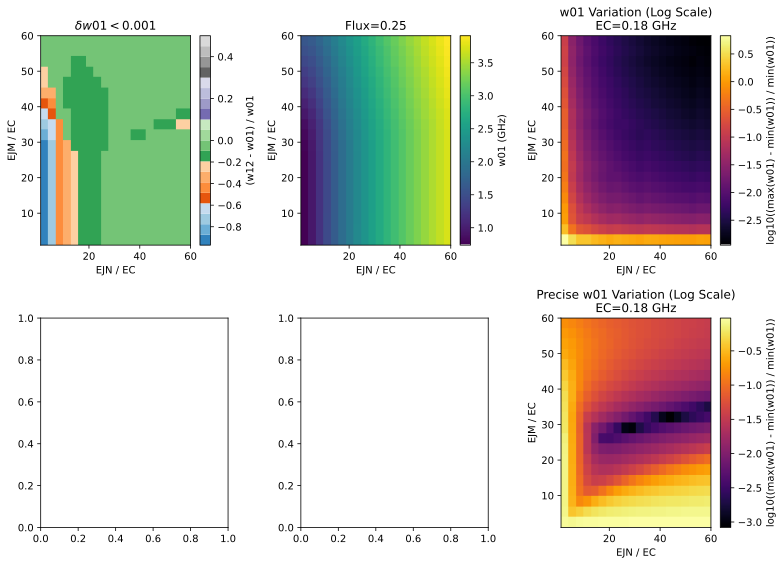

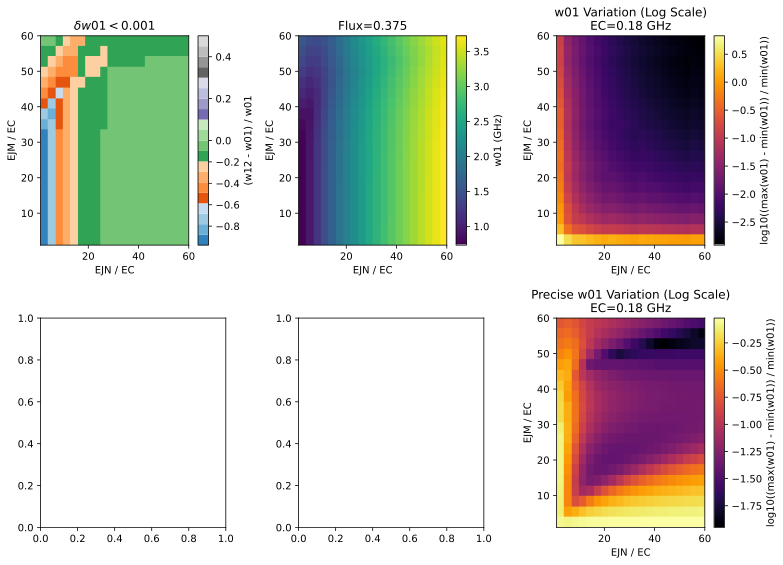

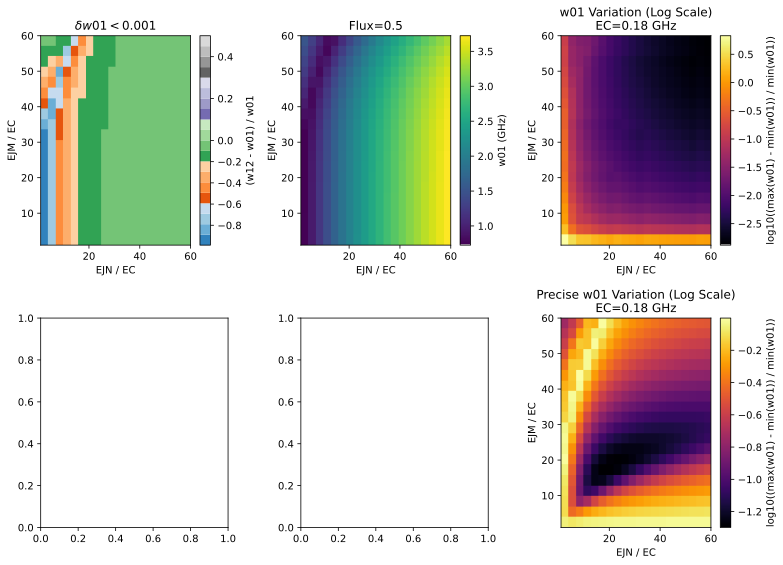

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

w01_variation_levels = [1e-1, 1e-2, 10**(-3)]

for w01_variation_lev in w01_variation_levels:

    for k, flux_value in enumerate(flux_list[:]):

        # k = flux_list.shape[0] - 1

        EJN_grid, EJM_grid = np.meshgrid(EJN_list, EJM_list)

        # Extract arrays for the current flux value
        relative_anharm_list = relative_anharm_list_flux[:, :, k]
        w01_list = w01_list_flux[:, :, k]
        w01_variation_list = w01_variation_list_flux[:, :, k]

        # Replace NaN values in relative_anharm_list
        relative_anharm_list[np.isnan(relative_anharm_list)] = 1

        # Create DataFrame for all data points
        data = {
            'EJN': EJN_grid.flatten(),
            'EJM': EJM_grid.flatten(),
            'RelativeAnharmonicity': relative_anharm_list.flatten(),
            'w01': w01_list.flatten(),
            'w01Variation': w01_variation_list.flatten()
        }
        df = pd.DataFrame(data)

        # Filter rows where w01Variation < 10^(-1)
        filtered_df = df[df['w01Variation'] < w01_variation_lev]

        # Identify the top N_anharm points (lowest anharmonicity values)
        N_anharm = 100
        best_points = filtered_df.nsmallest(N_anharm, 'RelativeAnharmonicity')

        # Adjust alpha values for star-points
        best_anharm_values = best_points['RelativeAnharmonicity'].values
        
        N_anharm = best_anharm_values.shape[0]

        alphas = np.ones(N_anharm)
        for i in range(1, N_anharm):
            if abs(best_anharm_values[i] - best_anharm_values[i - 1]) > 1e-3:
                alphas[i:] = np.logspace(0, -2, N_anharm - i)
                break

        # Plot with imshow and overlay star-points
        fig, axes = plt.subplots(2, 3, figsize=(11, 8))

        # First subplot: Relative Anharmonicity
        norm = colors.TwoSlopeNorm(vmin=df['RelativeAnharmonicity'].min(), vcenter=0, vmax=0.5)
        im1 = axes[0, 0].imshow(relative_anharm_list, extent=[EJN_grid.min() / EC_shunt, EJN_grid.max() / EC_shunt, 
                                                            EJM_grid.min() / EC_shunt, EJM_grid.max() / EC_shunt], 
                                origin='lower', cmap='tab20c', norm=norm, aspect='auto')
        fig.colorbar(im1, ax=axes[0, 0], label='(w12 - w01) / w01')
        axes[0, 0].set_title(r"$\delta w01 < {}$".format(round(w01_variation_lev, 3)))
        axes[0, 0].set_xlabel('EJN / EC')
        axes[0, 0].set_ylabel('EJM / EC')

        if not best_points.empty:
        # Overlay star-points
            axes[0, 0].scatter(best_points['EJN'] / EC_shunt, best_points['EJM'] / EC_shunt, 
                        s=100, c='red', marker='*', alpha=alphas)

        # Second subplot: w01
        im2 = axes[0, 1].imshow(w01_list, extent=[EJN_grid.min() / EC_shunt, EJN_grid.max() / EC_shunt, 
                                                EJM_grid.min() / EC_shunt, EJM_grid.max() / EC_shunt], 
                                origin='lower', cmap='viridis', aspect='auto')
        fig.colorbar(im2, ax=axes[0, 1], label='w01 (GHz)')
        axes[0, 1].set_title(f"Flux={flux_value}")
        axes[0, 1].set_xlabel('EJN / EC')
        axes[0, 1].set_ylabel('EJM / EC')

        if not best_points.empty:
        # Overlay star-points
            axes[0, 1].scatter(best_points['EJN'] / EC_shunt, best_points['EJM'] / EC_shunt, 
                        s=100, c='red', marker='*', alpha=alphas)

        # Third subplot: Log10 of w01 Variation
        im3 = axes[0, 2].imshow(np.log10(w01_variation_list), extent=[EJN_grid.min() / EC_shunt, EJN_grid.max() / EC_shunt, 
                                                                    EJM_grid.min() / EC_shunt, EJM_grid.max() / EC_shunt], 
                                origin='lower', cmap='inferno', aspect='auto')
        fig.colorbar(im3, ax=axes[0, 2], label='log10((max(w01) - min(w01)) / min(w01))')
        axes[0, 2].set_title(f"w01 Variation (Log Scale)\nEC={round(EC_shunt, 2)} GHz")
        axes[0, 2].set_xlabel('EJN / EC')
        axes[0, 2].set_ylabel('EJM / EC')

        if not best_points.empty:
        # Overlay star-points
            axes[0, 2].scatter(best_points['EJN'] / EC_shunt, best_points['EJM'] / EC_shunt, 
                        s=100, c='red', marker='*', alpha=alphas)
        

        im3 = axes[1, 2].imshow(np.log10(w01_variation_list_precise[:, :, k]), extent=[EJN_grid.min() / EC_shunt, EJN_grid.max() / EC_shunt, 
                                                                    EJM_grid.min() / EC_shunt, EJM_grid.max() / EC_shunt], 
                                origin='lower', cmap='inferno', aspect='auto')
        fig.colorbar(im3, ax=axes[1,2], label='log10((max(w01) - min(w01)) / min(w01))')
        axes[1][2].set_title(f"Precise w01 Variation (Log Scale)\nEC={round(EC_shunt, 2)} GHz")
        axes[1][2].set_xlabel('EJN / EC')
        axes[1][2].set_ylabel('EJM / EC')

        if not best_points.empty:
        # Overlay star-points
            axes[1][2].scatter(best_points['EJN'] / EC_shunt, best_points['EJM'] / EC_shunt, 
                        s=100, c='red', marker='*', alpha=alphas)
        

        # axes[1][2].plot(x, x,'--', color = 'white', lw=2)

        # Adjust layout and save the figure
        plt.tight_layout()
        plt.savefig(f"./data_figures/N={N}_M={M}_EC={round(EC_shunt, 2)}_flux_{k}_combined_plots.pdf")
        plt.show()


In [ ]:
# Plot with imshow and overlay star-points
fig, axes = plt.subplots(2, 3, figsize=(11, 8))

# First subplot: Relative Anharmonicity
norm = colors.TwoSlopeNorm(vmin=df['RelativeAnharmonicity'].min(), vcenter=0, vmax=0.5)
im1 = axes[0, 0].imshow(relative_anharm_list, extent=[EJN_grid.min() / EC_shunt, EJN_grid.max() / EC_shunt, 
                                                      EJM_grid.min() / EC_shunt, EJM_grid.max() / EC_shunt], 
                        origin='lower', cmap='tab20c', norm=norm, aspect='auto')
fig.colorbar(im1, ax=axes[0, 0], label='(w12 - w01) / w01')
axes[0, 0].set_title(r"$\delta w01 < {}$".format(round(w01_variation_lev, 3)))
axes[0, 0].set_xlabel('EJN / EC')
axes[0, 0].set_ylabel('EJM / EC')

# Overlay star-points
axes[0, 0].scatter(best_points['EJN'] / EC_shunt, best_points['EJM'] / EC_shunt, 
                   s=100, c='red', marker='*', alpha=alphas)

# Second subplot: w01
im2 = axes[0, 1].imshow(w01_list, extent=[EJN_grid.min() / EC_shunt, EJN_grid.max() / EC_shunt, 
                                          EJM_grid.min() / EC_shunt, EJM_grid.max() / EC_shunt], 
                        origin='lower', cmap='viridis', aspect='auto')
fig.colorbar(im2, ax=axes[0, 1], label='w01 (GHz)')
axes[0, 1].set_title(f"w01\nEC={round(EC_shunt, 2)} GHz")
axes[0, 1].set_xlabel('EJN / EC')
axes[0, 1].set_ylabel('EJM / EC')

# Overlay star-points
axes[0, 1].scatter(best_points['EJN'] / EC_shunt, best_points['EJM'] / EC_shunt, 
                   s=100, c='red', marker='*', alpha=alphas)

# Third subplot: Log10 of w01 Variation
im3 = axes[0, 2].imshow(np.log10(w01_variation_list), extent=[EJN_grid.min() / EC_shunt, EJN_grid.max() / EC_shunt, 
                                                              EJM_grid.min() / EC_shunt, EJM_grid.max() / EC_shunt], 
                        origin='lower', cmap='inferno', aspect='auto')
fig.colorbar(im3, ax=axes[0, 2], label='log10((max(w01) - min(w01)) / min(w01))')
axes[0, 2].set_title(f"w01 Variation (Log Scale)\nEC={round(EC_shunt, 2)} GHz")
axes[0, 2].set_xlabel('EJN / EC')
axes[0, 2].set_ylabel('EJM / EC')

# Overlay star-points
axes[0, 2].scatter(best_points['EJN'] / EC_shunt, best_points['EJM'] / EC_shunt, 
                   s=100, c='red', marker='*', alpha=alphas)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig(f"./data_figures/N={N}_M={M}_EC={round(EC_shunt, 2)}_flux_{k}_combined_plots.pdf")
plt.show()

In [32]:
# import tensorflow as tf
devices = tf.config.list_physical_devices()
print("\nDevices: ", devices)

gpus = tf.config.list_physical_devices('GPU')
if gpus:
  details = tf.config.experimental.get_device_details(gpus[0])
  print("GPU details: ", details)


Devices:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [33]:
devices[0]

PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')

In [34]:
import tensorflow as tf
import numpy as np
import time

# Generate a large random symmetric matrix
symmetric_matrix = nmon.H.toarray()

# Convert to TensorFlow tensor
matrix_tensor = tf.constant(symmetric_matrix, dtype=tf.float32)

# Function to solve eigenproblem and measure time
def compute_eigenproblem(matrix, device):
    with tf.device(device):
        start_time = time.time()
        eigenvalues, eigenvectors = tf.linalg.eigh(matrix)  # Symmetric matrix
        elapsed_time = time.time() - start_time
    return eigenvalues, eigenvectors, elapsed_time

# Solve on GPU
gpu_eigenvalues, gpu_eigenvectors, gpu_time = compute_eigenproblem(matrix_tensor, "GPU")

# Solve on CPU
cpu_eigenvalues, cpu_eigenvectors, cpu_time = compute_eigenproblem(matrix_tensor, "CPU")

# Compare results
print("GPU Time: {:.2f} seconds".format(gpu_time))
print("CPU Time: {:.2f} seconds".format(cpu_time))
print("Eigenvalue Difference: {:.6e}".format(tf.reduce_max(tf.abs(gpu_eigenvalues - cpu_eigenvalues)).numpy()))


 c:\Users\gusarov\AppData\Local\miniconda3\envs\py11_normal_pkg\Lib\site-packages\tensorflow\python\framework\constant_op.py: 108

GPU Time: 62.89 seconds
CPU Time: 65.44 seconds
Eigenvalue Difference: 0.000000e+00


In [35]:
import numpy as np
from np_eigh_cython import compute_eigsh_np


ModuleNotFoundError: No module named 'np_eigh_cython'

In [ ]:
nmon.H_arr = np.absolute(nmon.H_arr)
# Call the compiled function
evals, evecs = compute_eigsh_np(nmon.H_arr) # currently, complex implementation

print("Eigenvalues:", evals)

Eigenvalues: [-1.55349854e+01 -1.06974753e+01 -6.05111544e+00 ...  5.26679807e+05
  5.71681906e+05  5.71681906e+05]


In [ ]:
import numpy as np
from numba import njit

@njit
def compute_eigh(H):
    return np.linalg.eigh(H)

In [ ]:
nmon.H_arr = np.absolute(nmon.H_arr)
eigenvalues, eigenvectors = compute_eigh(nmon.H_arr)